In [36]:
import numpy as np
import matplotlib.pyplot as plt

funcs = [
    lambda x : np.sin(x**2),
    lambda x : np.cos(np.sin(x)),
    lambda x : np.exp(np.cos(np.sin(x))),
    lambda x : np.log(x+3),
    lambda x : np.sqrt(x+3)
]

an_diffs = [
    lambda x : np.cos(x**2) * 2 * x,
    lambda x : -np.sin(np.sin(x)) * np.cos(x),
    lambda x : funcs[2](x) * (-np.sin(np.sin(x)) * np.cos(x)),
    lambda x : 1 / (x + 3),
    lambda x : 1 / 2 / np.sqrt(x+3)
]

def num_diff_sample(f, x_arr, h, coeffs):
    sum = 0
    for x, c in zip(x_arr, coeffs):
        sum += c * f(x)
    return sum / h

h_array = [1 / 2 ** (n - 1) for n in range(1, 22)]

diff_hcoeffs_list = [
    [1, 0],
    [0, -1],
    [1, -1],
    [1, -1, 2, -2],
    [1, -1, 2, -2, 3, -3]
]

diff_hcoeffs = [np.array(li) for li in diff_hcoeffs_list]

diff_fcoeffs_list = [
    [1, -1],
    [1, -1],
    [1/2, -1/2],
    [4/6, -4/6, -1/12, 1/12],
    [3/4, -3/4, -3/20, 3/20, 1/60, -1/60]
]

diff_fcoeffs = [np.array(li) for li in diff_fcoeffs_list]

def num_diff(func_num, h_num, diff_num):
    return num_diff_sample(funcs[func_num], diff_hcoeffs[diff_num] * h_array[h_num] + 5, h_array[h_num], diff_fcoeffs[diff_num])

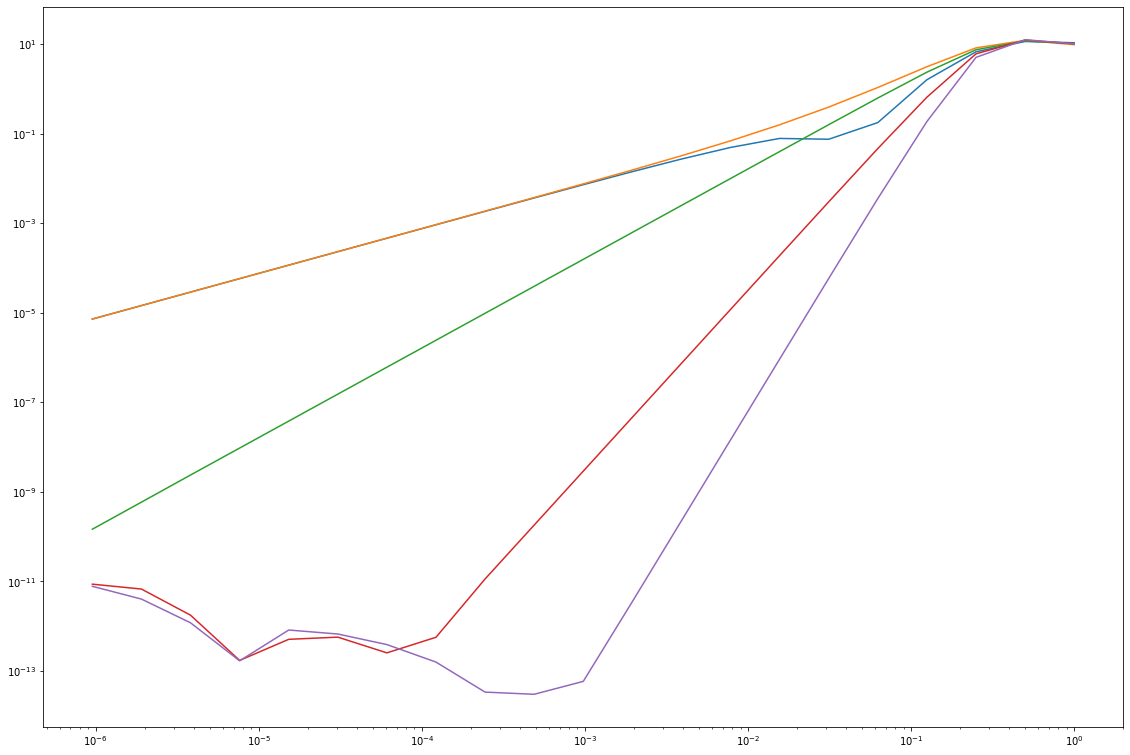

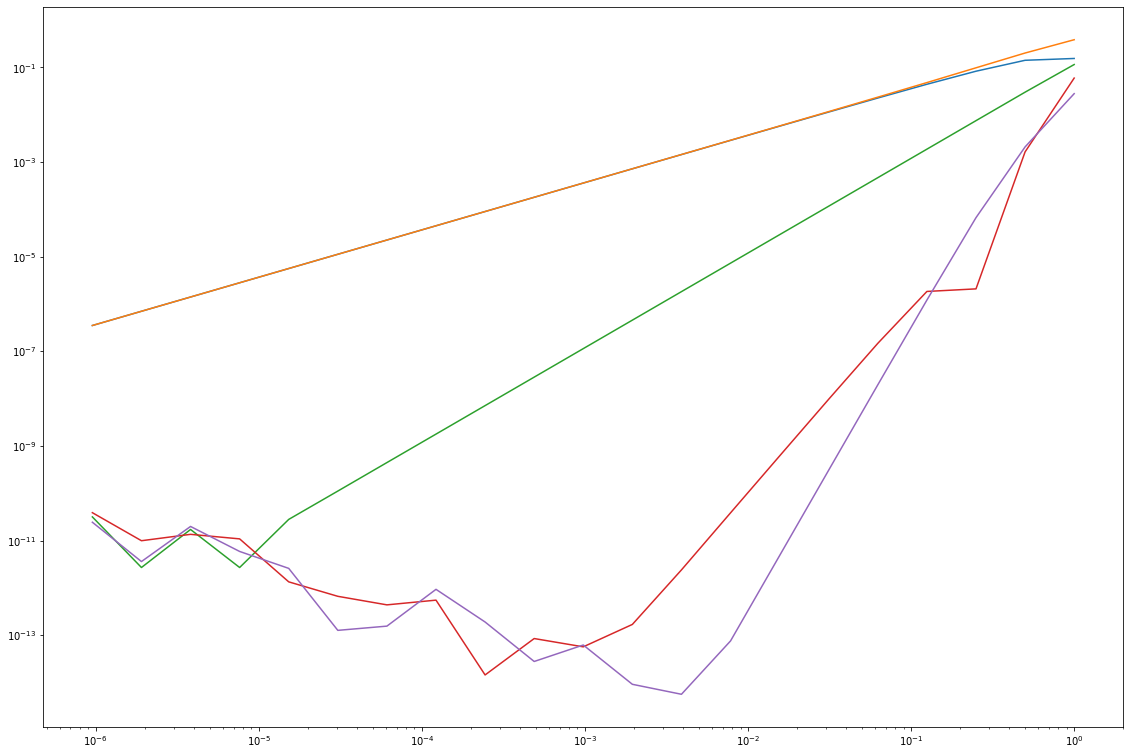

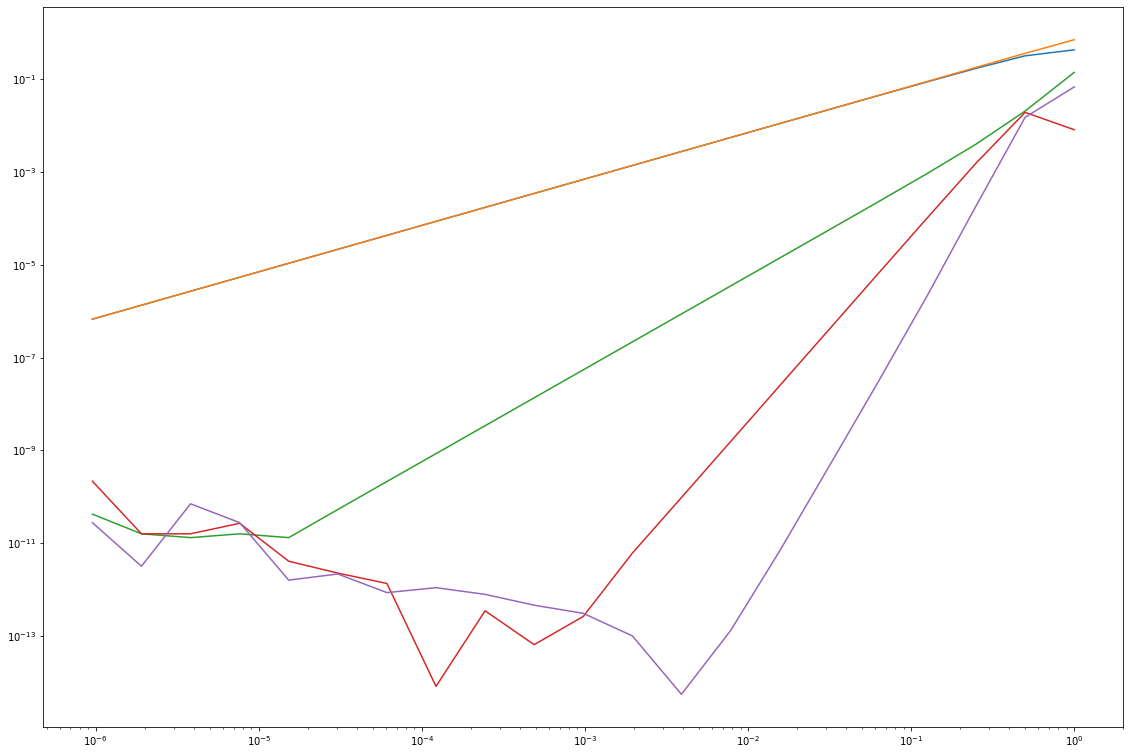

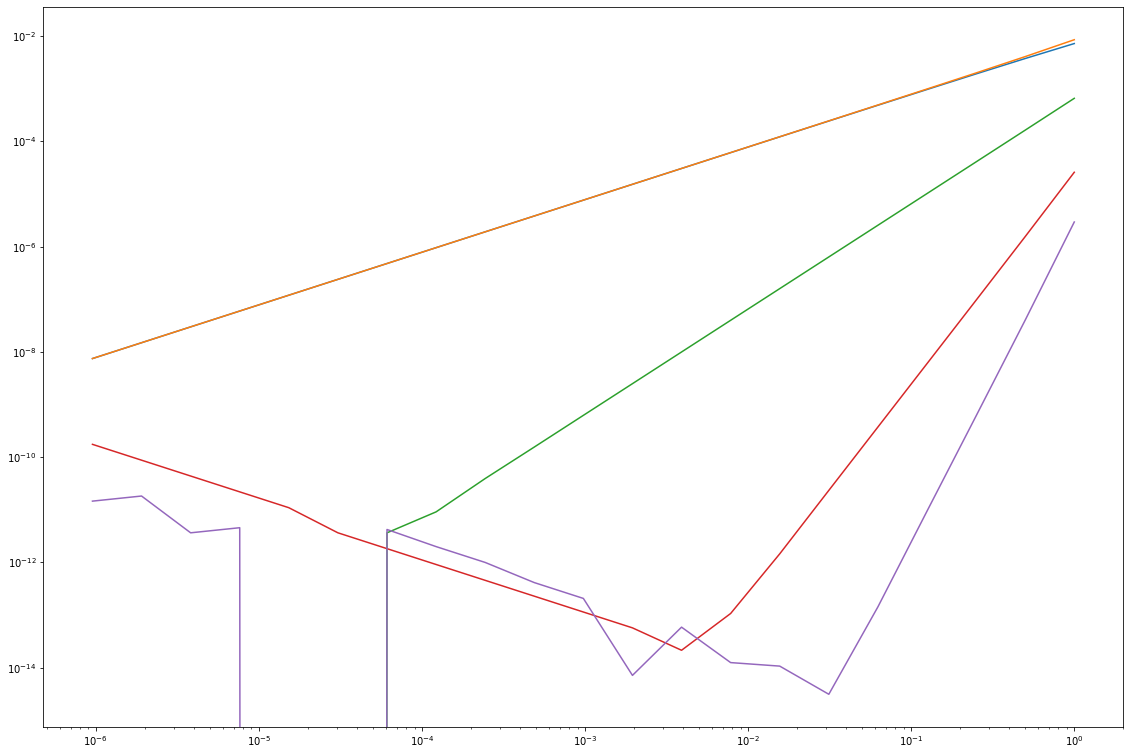

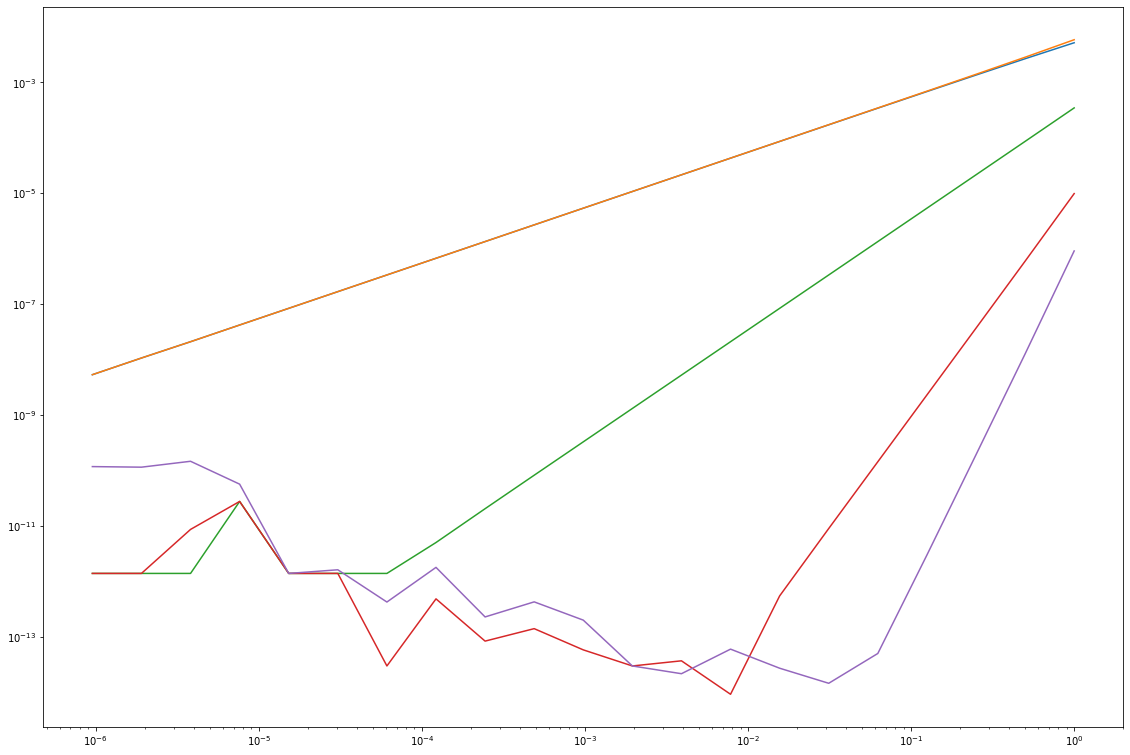

In [60]:
for n in range(5):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_axes([1,1,1,1])
    for i in range(5):
        plt.xscale('log')
        plt.yscale('log')
        ax.plot(h_array, np.abs(np.array([num_diff(n, h, i) for h in range(21)]) - an_diffs[n](5)))
    plt.show()